## Group8 Project2
組員：B094020027洪唯瑄，B094020042黃萱妮
## 分析主題：The Lovely Bones主題分類、人物關係，及字詞分類
動機：組員針對喜歡的小說查看模型的分析結果，更深入地了解故事背後的細節和主題，以及角色之間的關係。有助於我們欣賞和解讀這本小說，並從中獲得更多啟發和共鳴。
<br>
影片連結：https://youtu.be/ETg-2g5hkhs

# 大綱
## 1. 字詞分類
- 資料集介紹
- 資料前處理
- 切分資料集
- 將文章轉成DTM
- 模型分類效果分析

## 2. 主題模型(LDA & LDAvis)及人物關係圖
- 資料集介紹
- 資料前處理
- LDA
- LDAvis
- 主題應用分析
- 取得PERSON實體
- 繪製人物關係圖



## 1. 字詞分類
**資料集介紹：**<br>
選用兩本小說 The lovely bones 跟 Da vinci code為主要文本。

In [ ]:
# 載入套件
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

from wordcloud import WordCloud # pip install wordcloud
import matplotlib.pyplot as plt

# 下載斷句需要的資源
nltk.download('punkt')
# 下載POS tagger需要的資源
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
book = open('raw_data/The_lovely_bones.txt', mode='r', encoding="utf-8")
content = book.read()

In [ ]:
book_dvc = open('raw_data/da_vinci_code.txt', mode='r', encoding="utf-8")
content = book_dvc.read()

In [ ]:
content_dict2 = {'text': [content]}
content_df2 = pd.DataFrame(content_dict2)
content_df2

text
0  The Da Vinci Code \n\n\n\nDan Brown \n\n\n\nFO...

In [ ]:
content_dict = {'text': [content]}
content_df = pd.DataFrame(content_dict)
content_df

text
0  ﻿THE LOVELY BONES\n\n\nInside the snow globe o...

In [ ]:
content_df2 = content_df2.assign(sentence = content_df2['text'].apply(nltk.sent_tokenize)).explode('sentence').drop(['text'], axis=1)
content_df2

sentence
0   The Da Vinci Code \n\n\n\nDan Brown \n\n\n\nFO...
0                                     MORE THAN EVER.
0   Acknowledgments \n\nFirst and foremost, to my ...
0   And to the incomparable Heide Lange — tireless...
0   I cannot fully express my gratitude to the exc...
..                                                ...
0   The quest for the Holy Grail \nis the quest to...
0   A journey to pray at the feet of the \noutcast...
0   With a sudden upwelling of reverence, Robert L...
0   For a moment, he thought he heard a woman's vo...
0   Copyright © 2003 by Dan Brown \nISBN 0-385-504...

[12763 rows x 1 columns]

In [ ]:
content_df = content_df.assign(sentence = content_df['text'].apply(nltk.sent_tokenize)).explode('sentence').drop(['text'], axis=1)
content_df

sentence
0   ﻿THE LOVELY BONES\n\n\nInside the snow globe o...
0   When I was little my father would pull me into...
0   He would turn it over, letting all the snow co...
0   The two of us watched the snow fall gently aro...
0   The penguin was alone in there, I thought, and...
..                                                ...
0   He held out the muddy bracelet as she set down...
0     “This little girl’s grown up by now,” she said.
0                                             Almost.
0                                          Not quite.
0               I wish you all a long and happy life.

[6135 rows x 1 columns]

In [ ]:
def get_chapter_sentences(list):
    if re.search('CHAPTER', list) == None:
        return 0
    else:
        return 1

content_df2['chapter'] = content_df2['sentence'].apply(get_chapter_sentences).cumsum()
content_df2

sentence  chapter
0   The Da Vinci Code \n\n\n\nDan Brown \n\n\n\nFO...        0
0                                     MORE THAN EVER.        0
0   Acknowledgments \n\nFirst and foremost, to my ...        0
0   And to the incomparable Heide Lange — tireless...        0
0   I cannot fully express my gratitude to the exc...        0
..                                                ...      ...
0   The quest for the Holy Grail \nis the quest to...      108
0   A journey to pray at the feet of the \noutcast...      108
0   With a sudden upwelling of reverence, Robert L...      108
0   For a moment, he thought he heard a woman's vo...      108
0   Copyright © 2003 by Dan Brown \nISBN 0-385-504...      108

[12763 rows x 2 columns]

In [ ]:
def get_chapter_sentences(list):
    if re.search('CHAPTER', list) == None:
        return 0
    else:
        return 1

content_df['chapter'] = content_df['sentence'].apply(get_chapter_sentences).cumsum()
content_df

sentence  chapter
0   ﻿THE LOVELY BONES\n\n\nInside the snow globe o...        0
0   When I was little my father would pull me into...        0
0   He would turn it over, letting all the snow co...        0
0   The two of us watched the snow fall gently aro...        0
0   The penguin was alone in there, I thought, and...        0
..                                                ...      ...
0   He held out the muddy bracelet as she set down...       25
0     “This little girl’s grown up by now,” she said.       25
0                                             Almost.       25
0                                          Not quite.       25
0               I wish you all a long and happy life.       25

[6135 rows x 2 columns]

In [ ]:
# 刪除CHAPTER的列
content_df2 = content_df2[~content_df2["sentence"].str.contains("CHAPTER")]

# 刪除長度小於1的句子
content_df2 = content_df2[~content_df2["sentence"].str.len() < 1]

# 刪除標點符號/數字/換行符號
content_df2["sentence"] = content_df2["sentence"].str.replace(r'[^a-zA-Z\s]','')  #只留下英文字母和空格(包含換行符號)
content_df2["sentence"] = content_df2["sentence"].str.replace(r'[\n]',' ')    #將換行符號替換成空格

content_df2

sentence  chapter
0   The Da Vinci Code \n\n\n\nDan Brown \n\n\n\nFO...        0
0                                     MORE THAN EVER.        0
0   Acknowledgments \n\nFirst and foremost, to my ...        0
0   And to the incomparable Heide Lange — tireless...        0
0   I cannot fully express my gratitude to the exc...        0
..                                                ...      ...
0   The quest for the Holy Grail \nis the quest to...      108
0   A journey to pray at the feet of the \noutcast...      108
0   With a sudden upwelling of reverence, Robert L...      108
0   For a moment, he thought he heard a woman's vo...      108
0   Copyright © 2003 by Dan Brown \nISBN 0-385-504...      108

[12655 rows x 2 columns]

In [ ]:
# 刪除CHAPTER的列
content_df = content_df[~content_df["sentence"].str.contains("CHAPTER")]

# 刪除長度小於1的句子
content_df = content_df[~content_df["sentence"].str.len() < 1]

# 刪除標點符號/數字/換行符號
content_df["sentence"] = content_df["sentence"].str.replace(r'[^a-zA-Z\s]','')  #只留下英文字母和空格(包含換行符號)
content_df["sentence"] = content_df["sentence"].str.replace(r'[\n]',' ')    #將換行符號替換成空格

content_df

sentence  chapter
0   ﻿THE LOVELY BONES\n\n\nInside the snow globe o...        0
0   When I was little my father would pull me into...        0
0   He would turn it over, letting all the snow co...        0
0   The two of us watched the snow fall gently aro...        0
0   The penguin was alone in there, I thought, and...        0
..                                                ...      ...
0   He held out the muddy bracelet as she set down...       25
0     “This little girl’s grown up by now,” she said.       25
0                                             Almost.       25
0                                          Not quite.       25
0               I wish you all a long and happy life.       25

[6110 rows x 2 columns]

In [ ]:
content_df2.to_csv("raw_data/dvc_data.csv", encoding = 'utf-8',index = False)

In [ ]:
content_df.to_csv("raw_data/lb_data.csv", encoding = 'utf-8',index = False)

In [ ]:
#匯入資料
dvc = pd.read_csv('./raw_data/dvc_data.csv')
lb = pd.read_csv('./raw_data/lb_data.csv')

#### 資料前處理(分章節)

In [ ]:
dvc = dvc.sample(6110)

In [ ]:
# lb.drop(columns="chapter", inplace=True)
dvc['title'] = 'Da vinci code'
lb['title'] = 'The lovely bones'
books = pd.concat([lb,dvc],axis=0)

In [ ]:
books.dropna(inplace=True)

In [ ]:
books

sentence  chapter   
0      ﻿THE LOVELY BONES\n\n\nInside the snow globe o...        0  \
1      When I was little my father would pull me into...        0   
2      He would turn it over, letting all the snow co...        0   
3      The two of us watched the snow fall gently aro...        0   
4      The penguin was alone in there, I thought, and...        0   
...                                                  ...      ...   
7551            The Rose is Magdalene is the Holy Grail.       65   
11035  He began with the \nclawed feet beneath the sa...       98   
6854   Her story is \neverywhere once you open your e...       59   
8889   "Remember the vinegar," Langdon whispered with...       79   
7590   Langdon closed the lid and examined the inlaid...       65   

                  title  
0      The lovely bones  
1      The lovely bones  
2      The lovely bones  
3      The lovely bones  
4      The lovely bones  
...                 ...  
7551      Da vinci code  
11035     Da vinci code  
6854      Da vinci code  
8889      Da vinci code  
7590      Da vinci code  

[12220 rows x 3 columns]

In [ ]:
# 書名章節數量
books['title'].value_counts()

title
The lovely bones    6110
Da vinci code       6110
Name: count, dtype: int64

#### 根據7:3的比例切分資料集
利用 sklearn 中的 train_test_split 函數將 raw_data 隨機切成 7:3，設置 `random_state` 讓每次切分的結果一致。y_train和y_test分別為訓練資料和測試資料的預測目標（每個句子所屬的書名id）。

In [ ]:
data = books.copy()
X = data["sentence"]
y = data["title"]

# 把整個資料集七三切
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777
)

X_train.head()

7507                                 It had rental plates.
516      She said the curator had heard I would be \nle...
447      Watching but not being able to steer the polic...
11631                         The signs \nwere everywhere.
4958     "No, but many of our clients \nemboss corporat...
Name: sentence, dtype: object

In [ ]:
# 看一下各個資料集切分的比例，應該要一致
print(
    f"raw data percentage :\n{data['title'].value_counts(normalize=True) * 100}"
)
print(f"\ntrain percentage :\n{y_train.value_counts(normalize=True) * 100}")
print(f"\ntest percentage :\n{y_test.value_counts(normalize=True) * 100}")

raw data percentage :
title
The lovely bones    50.0
Da vinci code       50.0
Name: proportion, dtype: float64

train percentage :
title
The lovely bones    50.222118
Da vinci code       49.777882
Name: proportion, dtype: float64

test percentage :
title
Da vinci code       50.518276
The lovely bones    49.481724
Name: proportion, dtype: float64


#### 將文章轉為 DTM

In [ ]:
# vectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
vectorizer.fit(X_train)
vec_train = vectorizer.transform(X_train)
vec_test = vectorizer.transform(X_test)

# classifier
clf = LogisticRegression()
clf.fit(vec_train, y_train)

y_pred = clf.predict(vec_test)
y_pred_proba = clf.predict_proba(vec_test)

In [ ]:
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

   Da vinci code       0.83      0.88      0.85      1852
The lovely bones       0.87      0.81      0.84      1814

        accuracy                           0.85      3666
       macro avg       0.85      0.85      0.85      3666
    weighted avg       0.85      0.85      0.85      3666



(array([0.5, 1.5]),
 [Text(0, 0.5, 'Da vinci code'), Text(0, 1.5, 'The lovely bones')])

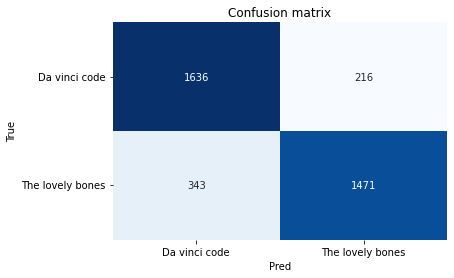

In [ ]:
classes = clf.classes_
cm = confusion_matrix(y_test, y_pred)
## Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(
    xlabel="Pred",
    ylabel="True",
    xticklabels=classes,
    yticklabels=classes,
    title="Confusion matrix",
)
plt.yticks(rotation=0)

In [ ]:
enc = OneHotEncoder(sparse=False)
enc.fit(y_train.values.reshape(-1, 1))
y_onehot_test = enc.transform(y_test.values.reshape(-1, 1))
y_onehot_test

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
y_test.head()

4874    The lovely bones
4945    The lovely bones
7122       Da vinci code
2275    The lovely bones
9769       Da vinci code
Name: title, dtype: object

In [ ]:
clf.classes_

array(['Da vinci code', 'The lovely bones'], dtype=object)

In [ ]:
enc.categories_

[array(['Da vinci code', 'The lovely bones'], dtype=object)]

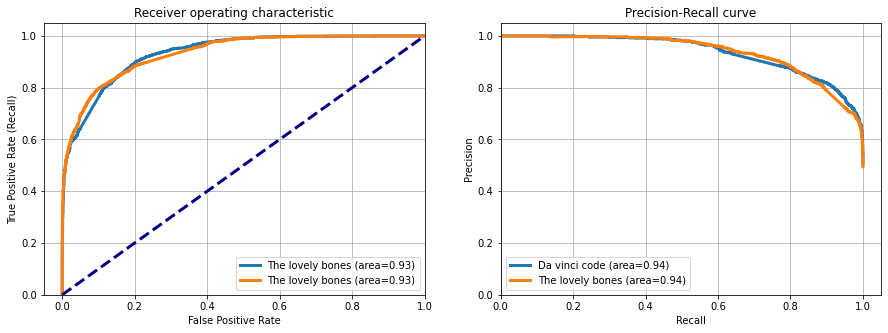

In [ ]:
# plot ROC curve and precision-recall curve
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_onehot_test[:, i], y_pred_proba[:, i])
    ax[0].plot(
        fpr, tpr, lw=3, label="{0} (area={1:0.2f})".format(classes[1], auc(fpr, tpr))
    )
    
ax[0].plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
ax[0].set(
    xlim=[-0.05, 1.0],
    ylim=[0.0, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate (Recall)",
    title="Receiver operating characteristic",
)
ax[0].legend(loc="lower right")
ax[0].grid(True)

## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
        y_onehot_test[:, i], y_pred_proba[:, i]
    )
    ax[1].plot(
        recall,
        precision,
        lw=3,
        label="{0} (area={1:0.2f})".format(classes[i], auc(recall, precision)),
    )
ax[1].set(
    xlim=[0.0, 1.05],
    ylim=[0.0, 1.05],
    xlabel="Recall",
    ylabel="Precision",
    title="Precision-Recall curve",
)
ax[1].legend(loc="best")
ax[1].grid(True)

plt.show()

### tfidf

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")
vec_train = vectorizer.fit_transform(X_train)
vec_test = vectorizer.transform(X_test)

clf.fit(vec_train, y_train)
y_pred = clf.predict(vec_test)
y_pred_proba = clf.predict_proba(vec_test)

# results
## Accuracy, Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

   Da vinci code       0.85      0.86      0.85      1852
The lovely bones       0.86      0.84      0.85      1814

        accuracy                           0.85      3666
       macro avg       0.85      0.85      0.85      3666
    weighted avg       0.85      0.85      0.85      3666



### cross validation

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                  precision    recall  f1-score   support

   Da vinci code       0.83      0.90      0.86      4258
The lovely bones       0.89      0.82      0.85      4296

        accuracy                           0.86      8554
       macro avg       0.86      0.86      0.86      8554
    weighted avg       0.86      0.86      0.86      8554



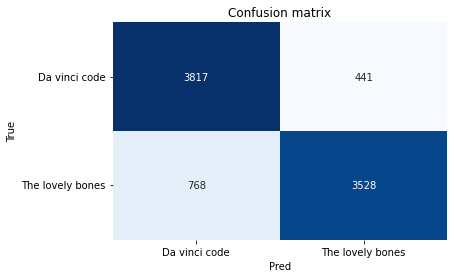

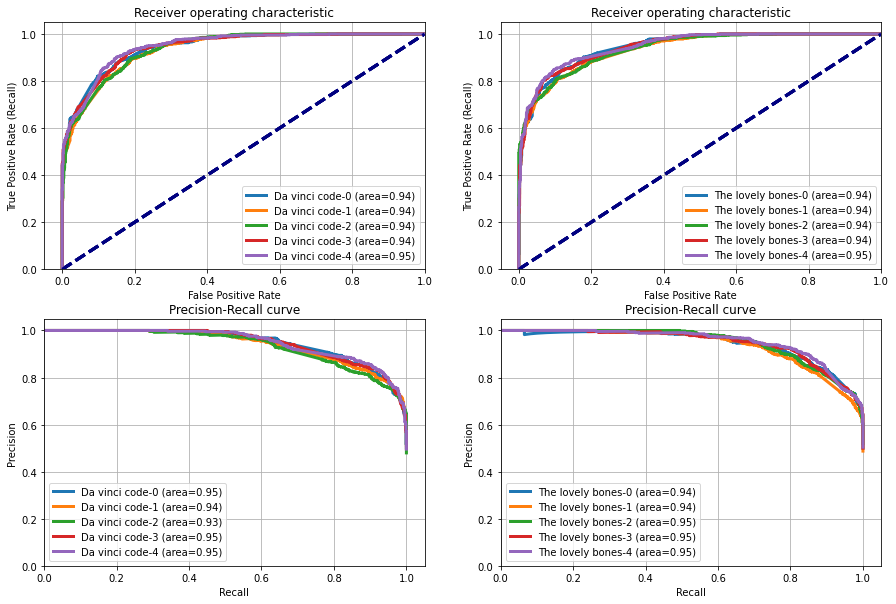

In [ ]:
# 定義模型訓練組合
## pipeline: 資料處理 vectorizer + 分類器 clf
## 由於 cross-validation 會自動將資料分成 train/test，因此 input 只要給 X, y 即可

def train_cv(vectorizer, clf, X, y):

    ## train classifier
    vec_X = vectorizer.fit_transform(X).toarray()
    
    ## get cv results
    cv_results = cross_validate(clf, vec_X, y, cv=5, return_estimator=True)
    y_pred = cross_val_predict(clf, vec_X, y, cv=5)
    y_pred_proba = cross_val_predict(clf, vec_X, y, cv=5, method="predict_proba")

    # one-hot encoding
    enc = OneHotEncoder(sparse=False)
    enc.fit(y.values.reshape(-1, 1))
    
    ## Accuracy, Precision, Recall, F1-score
    cls_report = classification_report(y, y_pred, output_dict=True)
    print(classification_report(y, y_pred))

    classes = cv_results['estimator'][0].classes_
    
    ## Plot confusion matrix
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cmap=plt.cm.Blues, cbar=False)
    ax.set(
        xlabel="Pred",
        ylabel="True",
        xticklabels=classes,
        yticklabels=classes,
        title="Confusion matrix",
    )
    plt.yticks(rotation=0)


    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    kf = KFold(n_splits=5)
    
    for k, (train, test) in enumerate(kf.split(vec_X, y)):
        clf.fit(vec_X[train,:], y.iloc[train])
        y_pred = clf.predict(vec_X[test,:])    
        y_test = y.iloc[test]
        y_pred_proba = clf.predict_proba(vec_X[test,:])
        y_onehot_test = enc.transform(y_test.values.reshape(-1, 1))
            
        ## Plot roc
        for i in range(len(classes)):
            fpr, tpr, thresholds = roc_curve(y_onehot_test[:, i], y_pred_proba[:, i])
            ax[0,i].plot(
                fpr,
                tpr,
                lw=3,
                label="{0}-{1} (area={2:0.2f})".format(classes[i], k, auc(fpr, tpr)),
            )
            ax[0,i].plot([0, 1], [0, 1], color="navy", lw=3, linestyle="--")
            ax[0,i].set(
                xlim=[-0.05, 1.0],
                ylim=[0.0, 1.05],
                xlabel="False Positive Rate",
                ylabel="True Positive Rate (Recall)",
                title="Receiver operating characteristic",
            )
            ax[0,i].legend(loc="best")
            ax[0,i].grid(True)

        ## Plot precision-recall curve
        for i in range(len(classes)):
            precision, recall, thresholds = precision_recall_curve(
                y_onehot_test[:, i], y_pred_proba[:, i]
            )
            ax[1,i].plot(
                recall,
                precision,
                lw=3,
                label="{0}-{1} (area={2:0.2f})".format(classes[i], k,auc(recall, precision)),
            )
            ax[1,i].set(
                xlim=[0.0, 1.05],
                ylim=[0.0, 1.05],
                xlabel="Recall",
                ylabel="Precision",
                title="Precision-Recall curve",
            )
            ax[1,i].legend(loc="best")
            ax[1,i].grid(True)

    plt.show()

    clf.fit(vec_X, y)
    # return the model object
    return cls_report

vectorizer = CountVectorizer(max_features=1000, stop_words="english")
clf = LogisticRegression()
result = train_cv(vectorizer, clf, X_train, y_train)

#### 比較模型效果(邏輯迴歸v.s.決策樹)

now training: clf_logistic


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                  precision    recall  f1-score   support

   Da vinci code       0.83      0.89      0.86      4256
The lovely bones       0.89      0.82      0.85      4298

        accuracy                           0.86      8554
       macro avg       0.86      0.86      0.86      8554
    weighted avg       0.86      0.86      0.86      8554



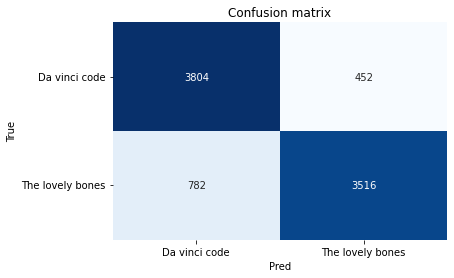

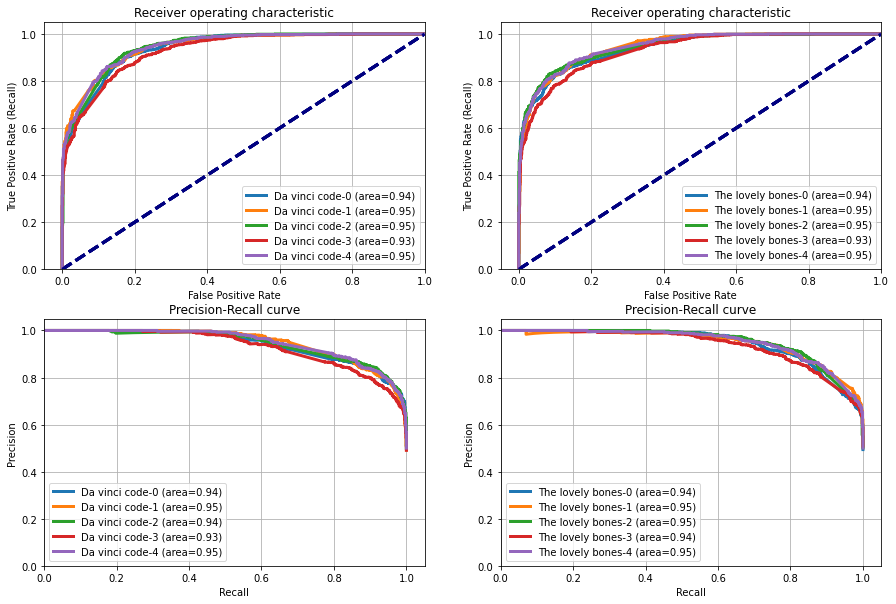

now training: clf_dtree


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


                  precision    recall  f1-score   support

   Da vinci code       0.77      0.82      0.80      4256
The lovely bones       0.81      0.76      0.79      4298

        accuracy                           0.79      8554
       macro avg       0.79      0.79      0.79      8554
    weighted avg       0.79      0.79      0.79      8554



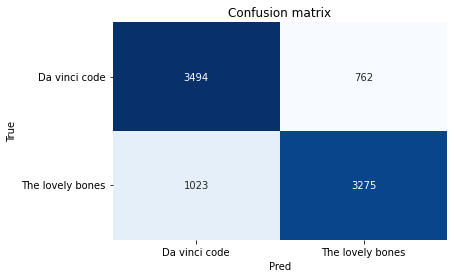

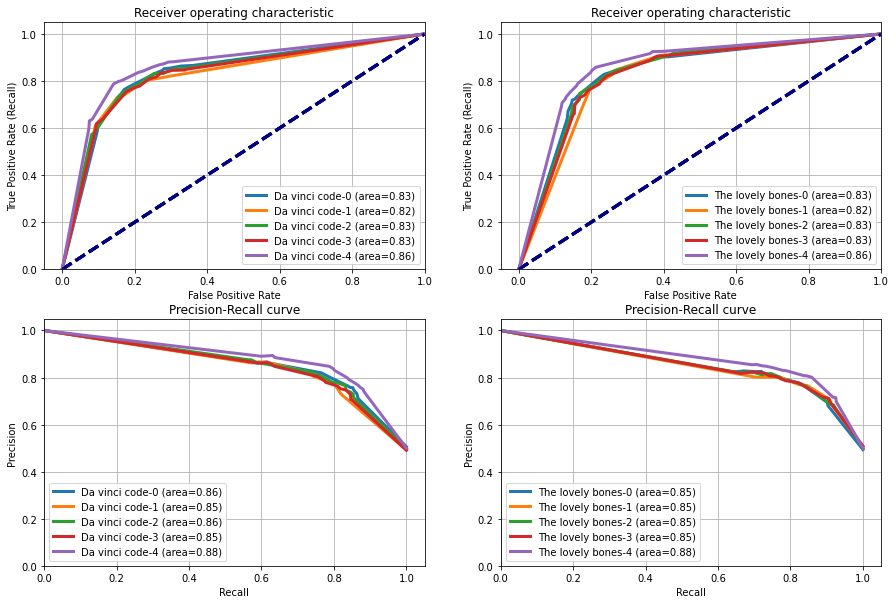

In [ ]:
# 準備訓練資料
X = data["sentence"]
y = data["title"]
# 把整個資料集七三切
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=798
)
# 定義模型訓練組合
model_set = dict()
model_set['clf_logistic'] = LogisticRegression()
model_set['clf_dtree'] = DecisionTreeClassifier()
# 定義 vectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words="english")
# 存結果
result_set = dict()

for k, model in model_set.items():
    print("="*100)
    print(f"now training: {k}")
    result_set[k] = train_cv(vectorizer, model, X_train, y_train)
    print("="*100)

In [ ]:
max = 0
best_model_name = ""
best_model_metric = "f1-score"

## choose max f1-score model from result_set
for k, v in result_set.items():
    if v['macro avg'][best_model_metric] > max:
        max = v['macro avg'][best_model_metric]
        best_model_name = k
print(f"best model: {best_model_name}")

best model: clf_logistic


In [ ]:
y_pred = model_set['clf_logistic'].predict(vectorizer.transform(X_test))
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

   Da vinci code       0.83      0.88      0.85      1852
The lovely bones       0.87      0.81      0.84      1814

        accuracy                           0.85      3666
       macro avg       0.85      0.85      0.85      3666
    weighted avg       0.85      0.85      0.85      3666



可以看到模型訓練的還算可以，但沒有說非常準確。<br>
或許是兩者小說用詞沒有說真的差很多，但因為The lovely bones會相較Da Vinci Code來說，用一些比較青少年的詞語，而Da Vinci Code則會出現比較多專業詞彙，所以還算能夠分辨文本。

各字詞特徵的estimate係數
對於線性的模型，可以藉由相關係數，查看資料特徵（詞）對於判斷分類的影響

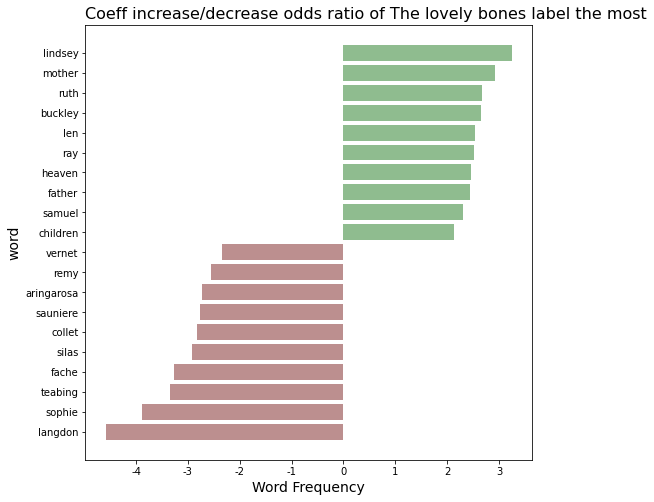

In [ ]:
def plot_coef(logistic_reg_model, feature_names, top_n=10):
    # 選出某個類別的前10大影響力字詞
    log_odds = logistic_reg_model.coef_.T
    coef_df = pd.DataFrame(
        log_odds, 
        columns=logistic_reg_model.classes_[[1]], index=feature_names
    )
    for label in coef_df.columns:
        select_words = (
            coef_df[[label]]
            .sort_values(by=label, ascending=False)
            .iloc[np.r_[0:top_n, -top_n:0]]
        )
        word = select_words.index
        count = select_words[label]
        category_colors = np.where(
            select_words[label] >= 0, "darkseagreen", "rosybrown"
        )  # 設定顏色

        fig, ax = plt.subplots(figsize=(8, top_n*0.8))  # 設定畫布
        plt.rcParams["axes.unicode_minus"] = False

        ax.barh(word, count, color=category_colors)
        ax.invert_yaxis()
        ax.set_title(
            "Coeff increase/decrease odds ratio of " + label + " label the most",
            loc="left",
            size=16,
        )
        ax.set_ylabel("word", size=14)
        ax.set_xlabel("Word Frequency", size=14)

# plot logistic model
plot_coef(logistic_reg_model=model_set['clf_logistic'], feature_names=vectorizer.get_feature_names_out(), top_n=10)

#### 決策樹圖

In [ ]:
feature_names = vectorizer.get_feature_names_out()

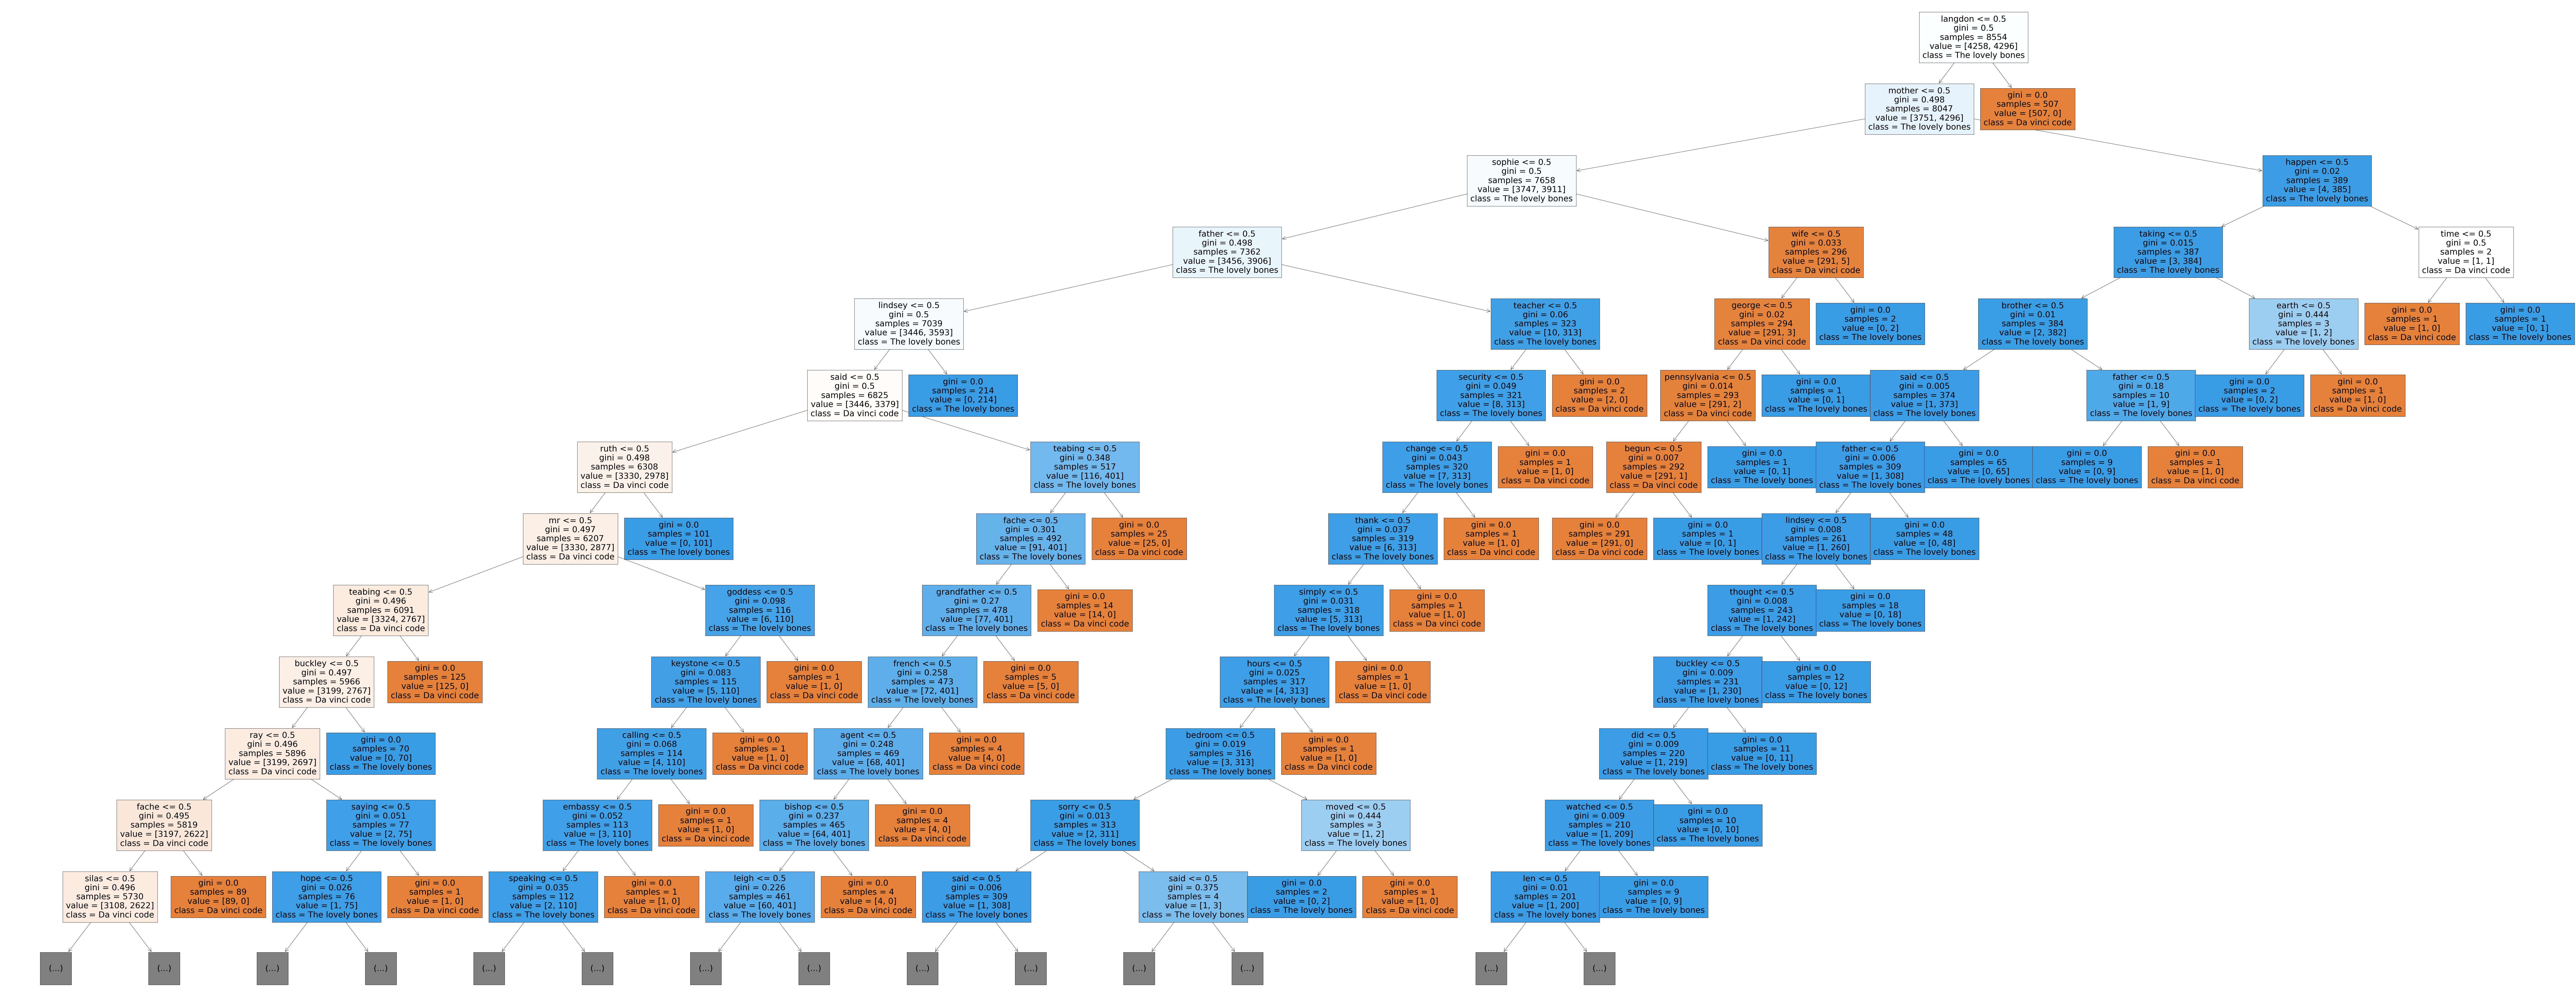

In [ ]:
fig = plt.figure()
fig.set_size_inches(200, 80)
plot_tree(
    model_set["clf_dtree"], 
    max_depth=12, # 最大深度
    feature_names=feature_names, 
    class_names=model_set["clf_dtree"].classes_,
    filled=True
)
fig.savefig("decistion_tree_en.png")

從決策樹的圖就可以看出沒辦法找到一些好的字來做為切點。

## 2. 主題模型(LDA & LDAvis)及人物關係圖
**資料集介紹：**<br>
選用其中一本小說The lovely bones做為主要文本。<br>
The Lovely Bones 中文書名譯為《蘇西的世界》，劇情描寫蘇西被哈維殺害之後，蘇西的朋友、戀人、家人以及蘇西自己慢慢接受事實並往前邁進的過程。

In [ ]:
import re
from nltk.corpus import stopwords

from pprint import pprint
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from gensim.matutils import corpus2csc

import pyLDAvis
import pyLDAvis.gensim_models

In [ ]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
books = pd.read_csv('/content/drive/MyDrive/socialmedia_project2/thelovelybones.csv')
books = books.iloc[1:,:]
books.head()

context  chapter
1  My name was Salmon, like the fish; first name,...        1
2  In my junior high yearbook I had a quote from ...        1
3  I wasn’t killed by Mr. Botte, by the way. Don’...        1
4  His daughter died a year and a half after I di...        1
5  But on December 6, 1973, it was snowing, and I...        1

In [ ]:
# 刪除CHAPTER的列
books = books[~books["context"].str.contains("CHAPTER")]

# 刪除長度小於1的句子
books = books[~books["context"].str.len() < 1]

# 刪除標點符號/數字/換行符號
books["context"] = books["context"].str.replace(r'[^a-zA-Z\s]','')  #只留下英文字母和空格(包含換行符號)
books["context"] = books["context"].str.replace(r'[\n]',' ')    #將換行符號替換成空格

books

chapter                                            context
0         1  my name was salmon, like the fish; first name,...
1         2  when i first entered heaven i thought everyone...
2         3  the odd thing about earth was what we saw when...
3         4  in the hours after i was murdered, as my mothe...
4         5  part of me wished swift vengeance, wanted my f...
5         6  two weeks before my death, i left the house la...
6         7  do you see her?” buckley asked nate as they cl...
7         8  for three months mr. harvey dreamed of buildin...
8         9  my grandmother arrived on the evening before m...
9        10  at the statewide gifted symposium each summer,...
10       11  when my father woke up at four a.m., the house...
11       12  i stood in the room beside him and watched him...
12       13  when she returned to junior high in the fall o...
13       14  for a week lindsey cased my killer’s house. sh...
14       15  at first no one stopped them, and it was somet...
15       16  a year to the day after my death, dr. singh ca...
16       17  with the camera my parents gave me, i took doz...
17       18  at twenty-one lindsey was many things i would ...
18       19  when her father mentioned the sinkhole on the ...
19       20  when she reached krusoe winery that morning, m...
20       21  by the time mr. harvey reached the tin-roofed ...
21       22  after i left my parents in the hospital, i wen...
22       23  ruth collapsing into the road. of this i was a...
23       24  the next morning the smell of his mother’s bak...
24       25  you don’t notice the dead leaving when they re...

In [ ]:
books = books.groupby('chapter')['context'].apply(lambda x: " ".join(x)).reset_index()
books.head()

chapter                                            context
0        1  my name was salmon, like the fish; first name,...
1        2  when i first entered heaven i thought everyone...
2        3  the odd thing about earth was what we saw when...
3        4  in the hours after i was murdered, as my mothe...
4        5  part of me wished swift vengeance, wanted my f...

In [ ]:
books['context'] = books['context'].str.lower()
docs = [[word for word in doc.split() if word not in stop_words] for doc in books['context']]

#### 在 docs 裡面新增出現次數大於 20 次的 bigram

In [ ]:
# Compute bigrams.

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [ ]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# print(dictionary)

In [ ]:
# Bag-of-words representation of the documents.
# 用 gensim ldamodel input 需要將文章轉換成 bag of words 
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [ ]:
t0 = time.time()

topic_num_list = np.arange(2, 16)
result = {"topic_num":[], "perplexity":[], "pmi":[]}
model_set = dict()


for topic_num in topic_num_list:
    # perplexity
    model = LdaModel(
        corpus = corpus,
        num_topics = topic_num ,
        id2word=dictionary,
        random_state = 1500,
        passes=5
        )
    
    loss = model.log_perplexity(corpus)
    pmi = CoherenceModel(model=model, texts=docs, coherence='c_npmi').get_coherence()
    perplexity = np.exp(-1. * loss)
    
    # model_set[f'k_{topic_num}'] = model
    
    result['topic_num'].append(topic_num)
    result['perplexity'].append(perplexity)
    result['pmi'].append(pmi)
    
print(f"花費時間: {time.time() - t0} sec")

花費時間: 131.7254650592804 sec


In [ ]:
result = pd.DataFrame(result)
result

topic_num   perplexity       pmi
0           2  5084.015383 -0.022444
1           3  5186.471313 -0.044380
2           4  5373.812003 -0.038523
3           5  5650.741148 -0.045155
4           6  5775.356234 -0.034380
5           7  5889.157602 -0.049425
6           8  6075.787207 -0.042540
7           9  6228.777301 -0.038278
8          10  6472.745029 -0.036101
9          11  6561.312023 -0.041550
10         12  6735.007993 -0.034551
11         13  6949.119049 -0.035923
12         14  7164.342021 -0.038314
13         15  7164.383104 -0.039490

<Axes: xlabel='topic_num'>

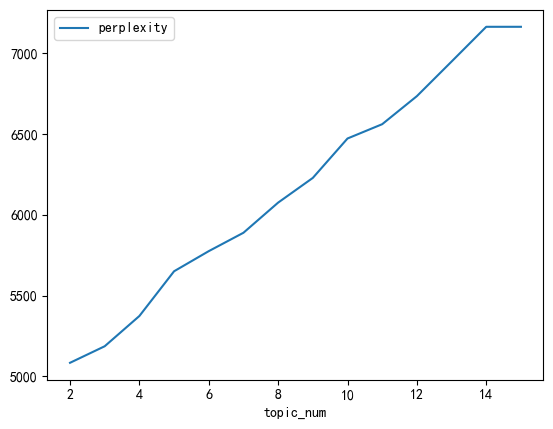

In [ ]:
result.plot.line(x='topic_num', y='perplexity')

<Axes: xlabel='topic_num'>

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


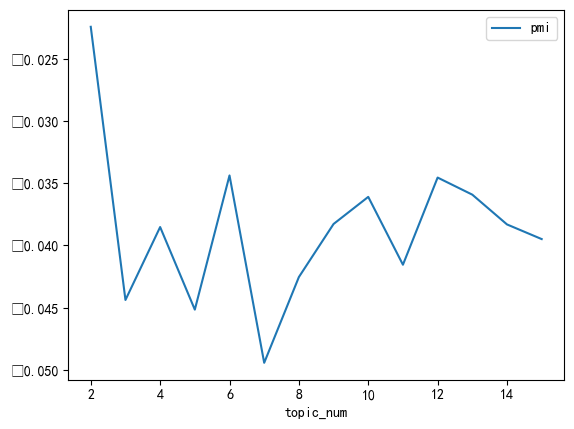

In [ ]:
result.plot.line(x='topic_num', y='pmi')

##### 可以看到在將小說章節分成7個主題時，主題內容關係最小

### 視覺化結果
以主題數為7做LDAvis視覺化結果

In [ ]:
model = LdaModel(
    corpus = corpus,
    num_topics = 7,
    id2word=dictionary,
    random_state = 1500,
    passes=5
    )

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.066793 -0.021012       1        1  53.247397
6     -0.075379 -0.015158       2        1  28.198137
4     -0.030021  0.072146       3        1  10.183897
5      0.017589 -0.055200       4        1   5.405374
1      0.028272  0.019147       5        1   2.951641
3      0.048506 -0.001482       6        1   0.006778
0      0.077826  0.001559       7        1   0.006777, topic_info=         Term        Freq       Total Category  logprob  loglift
1016    would  461.000000  461.000000  Default  30.0000  30.0000
298    father  352.000000  352.000000  Default  29.0000  29.0000
769     said.  389.000000  389.000000  Default  28.0000  28.0000
1035        —  392.000000  392.000000  Default  27.0000  27.0000
611    mother  362.000000  362.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
934      time    0.001405  104.131408   Topic7  -7.8417  -1.6143
767      said    0.001654  168.965183   Topic7  -7.6784  -1.9351
737       ray    0.001509  131.594811   Topic7  -7.7703  -1.7769
111   buckley    0.001481  130.944506   Topic7  -7.7884  -1.7901
646     never    0.001461  125.628269   Topic7  -7.8020  -1.7623

[556 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
7998      4  0.848312            (to
9736      3  0.908804          1976,
4         3  0.515926             6,
8006      4  0.576517    accessories
8008      4  0.893436  acknowledging
...     ...       ...            ...
1056      2  0.388541           “i’m
1056      3  0.028781           “i’m
1056      4  0.043171           “i’m
1056      5  0.014390           “i’m
5499      1  0.983147          “will

[718 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 5, 6, 2, 4, 1])

即使改變random_state，主題1和主題2圓心還是太過接近，嘗試後以主題數為5能得到相對好的結果

In [ ]:
model = LdaModel(
    corpus = corpus,
    num_topics = 5,
    id2word=dictionary,
    random_state = 12023,
    passes=5
    )

In [ ]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.043452  0.015747       1        1  39.669890
3      0.039479 -0.058396       2        1  21.821924
2      0.007932  0.042803       3        1  19.553273
0     -0.021412  0.026457       4        1  15.736621
4     -0.069451 -0.026611       5        1   3.218292, topic_info=            Term        Freq       Total Category  logprob  loglift
611       mother  342.000000  342.000000  Default  30.0000  30.0000
401       harvey   95.000000   95.000000  Default  29.0000  29.0000
620          mr.  171.000000  171.000000  Default  28.0000  28.0000
1016       would  442.000000  442.000000  Default  27.0000  27.0000
621   mr._harvey   81.000000   81.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
646        never    2.554531  122.329929   Topic5  -6.4989  -0.4325
767         said    2.642221  158.381242   Topic5  -6.4651  -0.6571
769        said.    2.925985  370.690535   Topic5  -6.3631  -1.4054
536         like    2.645754  227.904214   Topic5  -6.4638  -1.0197
541      lindsey    2.291129  257.797816   Topic5  -6.6077  -1.2868

[425 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
4         4  0.876803        6,
9412      1  0.834409   again.”
39        3  0.320684  answered
39        4  0.320684  answered
39        5  0.320684  answered
...     ...       ...       ...
4660      1  0.672985       “we
4660      2  0.192281       “we
4660      3  0.096141       “we
4660      4  0.032047       “we
4660      5  0.032047       “we

[729 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 5])

In [ ]:
pyLDAvis.save_html(p, "lda_en.html")

#### 主題分佈的應用，搭配其他文章資訊

In [ ]:
# 取得每章的主題分佈
topics_doc = model.get_document_topics(corpus)

In [ ]:
m_theta = corpus2csc(topics_doc).T.toarray()
theta = pd.DataFrame(m_theta, columns=[f"topic_{i+1}" for i in range(m_theta.shape[1])])
theta

topic_1   topic_2   topic_3  topic_4   topic_5
0       0.0  0.000000  0.000000  0.00000  0.999535
1       0.0  0.000000  0.334906  0.00000  0.664910
2       0.0  0.000000  0.000000  0.00000  0.999643
3       0.0  0.999478  0.000000  0.00000  0.000000
4       0.0  0.000000  0.132988  0.00000  0.866740
5       0.0  0.000000  0.046640  0.95317  0.000000
6       0.0  0.000000  0.998869  0.00000  0.000000
7       0.0  0.000000  0.000000  0.00000  0.996730
8       0.0  0.000000  0.999677  0.00000  0.000000
9       0.0  0.000000  0.999622  0.00000  0.000000
10      0.0  0.000000  0.000000  0.00000  0.999671
11      0.0  0.000000  0.999646  0.00000  0.000000
12      0.0  0.999715  0.000000  0.00000  0.000000
13      0.0  0.000000  0.000000  0.00000  0.999637
14      0.0  0.000000  0.999522  0.00000  0.000000
15      0.0  0.667996  0.331723  0.00000  0.000000
16      0.0  0.999760  0.000000  0.00000  0.000000
17      0.0  0.000000  0.999698  0.00000  0.000000
18      0.0  0.000000  0.999656  0.00000  0.000000
19      0.0  0.000000  0.999423  0.00000  0.000000
20      0.0  0.000000  0.999567  0.00000  0.000000
21      0.0  0.000000  0.999723  0.00000  0.000000
22      0.0  0.000000  0.999592  0.00000  0.000000
23      0.0  0.000000  0.999521  0.00000  0.000000
24      0.0  0.000000  0.999012  0.00000  0.000000

<Axes: >

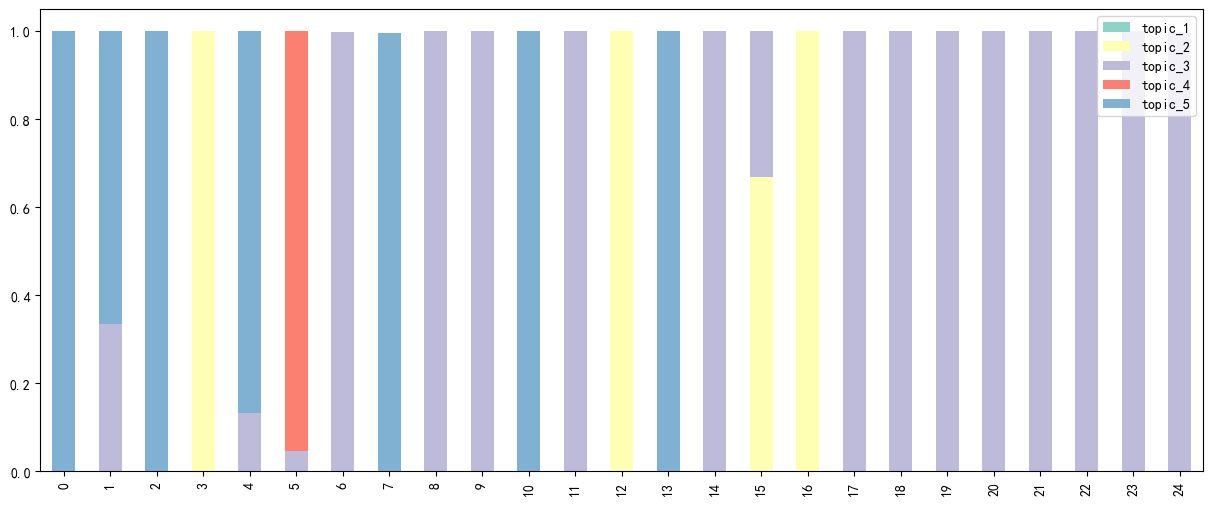

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
theta.plot.bar(ax=ax, stacked=True, color = plt.cm.Set3.colors)

根據Topic words搭配章節預測主題，我們預測：<br>
Topic 2或3：蘇西、家人放下仇恨，繼續往前<br>
Topic 4：蘇西妹妹(Lindsey)和父親尋找殺害蘇西的兇手<br>
Topic 5：蘇西、家人和哈維的互動

### 以The Lovely Bones製作人物關係圖

In [ ]:
import os

##出現提示欄進行授權

os.chdir('/content/drive/MyDrive/SMA/SMA_2023S-master/final_proj') #切換該目錄

In [ ]:
! pip install pyvis networkx pandas numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.4 MB/s eta 0:00:00


In [ ]:
!python3 net_func.py

In [ ]:
import pandas as pd
import numpy as np
import pyvis
import networkx as nx
import IPython
import random
from itertools import combinations
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import net_func

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
meta = pd.read_csv('/content/drive/MyDrive/SMA/SMA_2023S-master/final_proj/raw_data/lb_data.csv')

In [ ]:
def getPerson(sentence,excludePerson):
  """
  給定句子、拿到有存在的person實體
  """
  names = []
  for sent in nltk.sent_tokenize(sentence):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
      if hasattr(chunk, 'label'):
        if chunk.label() == 'PERSON':
          name = ' '.join(c[0] for c in chunk)
          if name not in excludePerson:
            names.append(name)
  return list(set(names))
excludePerson = ['Sir','Lady','Madam','Miss','Had', 'Poor']
meta['person'] = meta.sentence.apply(lambda r: getPerson(r,excludePerson),)
# 取出出現平凡的人名、出現超過五次的
single_freq = meta.explode('person').groupby('person').count().sort_values('sentence')
freqNames = single_freq[single_freq.sentence>=5].index.tolist()
freqNames

['Mr. O',
 'Mommy',
 'Mr. Peterford',
 'Sorry',
 'Grace',
 'Hal Heckler',
 'Keesha',
 'Stead',
 'Dad',
 'Brian Nelson',
 'Mr. Caden',
 'Susie Salmon',
 'Detective Fenerman',
 'Singh',
 'Christmas',
 'Mr. Botte',
 'Daddy',
 'Mother',
 'Dewitt',
 'Ruana Singh',
 'Mr. Salmon',
 'Hello',
 'Earth',
 'Buck',
 'Grandma',
 'Salmon',
 'Franny',
 'Samuel Heckler',
 'Mom',
 'Fenerman',
 'Jack',
 'Ray Singh',
 'Artie',
 'Holly',
 'George Harvey',
 'Don',
 'Clarissa',
 'Len Fenerman',
 'Harvey',
 'Abigail',
 'Mr.',
 'Lynn',
 'Ruana',
 'Grandma Lynn',
 'Hal',
 'Susie',
 'Ruth',
 'Len',
 'Mr. Harvey',
 'Ray',
 'Samuel',
 'Buckley',
 'Lindsey']

In [ ]:
# 把每一個句子裡面出現的人名不再freqNames的拿掉
# 之後捨棄掉人名數量少於2的句子
filter_name = meta.copy()
def removeName(names,names_pool):
  return list(set(names).intersection(set(names_pool)))
filter_name['person'] = filter_name['person'].apply(lambda r:removeName(r,freqNames))
filter_name = filter_name[filter_name['person'].str.len()>1]

# 把人物取組合兩兩一組
def getComb(names):
  return list(combinations(names,2))
filter_name['name_comb'] = filter_name['person'].map(getComb)
filter_name

sentence  chapter  \
31         “Don’t let me startle you,” Mr. Harvey said.        1   
40    “Would you like to see?” “I’m sort of cold, Mr...        1   
51    Mr. Harvey would later say these words to my m...        1   
53    Mr. Harvey told her the usual: “I hope they ge...        1   
58    Mr. Harvey said it would only take a minute, s...        1   
...                                                 ...      ...   
6027  By the end of that summer, Mr. Connors had cle...       25   
6028  In the beginning it was uncomfortable, the lac...       25   
6045  Ray became Dr. Singh, “the real doctor in the ...       25   
6097  Samuel walked out to Lindsey then, and there s...       25   
6099  Samuel\nplaced Susie on a blanket near the flo...       25   

                   person                                     name_comb  
31      [Mr. Harvey, Don]                           [(Mr. Harvey, Don)]  
40    [Mr. Harvey, Susie]                         [(Mr. Harvey, Susie)]  
51          [Mr., Harvey]                               [(Mr., Harvey)]  
53          [Mr., Harvey]                               [(Mr., Harvey)]  
58          [Mr., Harvey]                               [(Mr., Harvey)]  
...                   ...                                           ...  
6027   [Buckley, Lindsey]                          [(Buckley, Lindsey)]  
6028    [Samuel, Lindsey]                           [(Samuel, Lindsey)]  
6045  [Ruana, Ray, Singh]  [(Ruana, Ray), (Ruana, Singh), (Ray, Singh)]  
6097    [Samuel, Lindsey]                           [(Samuel, Lindsey)]  
6099      [Samuel, Susie]                             [(Samuel, Susie)]  

[291 rows x 4 columns]

In [ ]:
filter_name = filter_name.reset_index(names=['sent_id']).explode('name_comb')[['sent_id','name_comb']]
filter_name

sent_id            name_comb
0         31    (Mr. Harvey, Don)
1         40  (Mr. Harvey, Susie)
2         51        (Mr., Harvey)
3         53        (Mr., Harvey)
4         58        (Mr., Harvey)
..       ...                  ...
288     6045         (Ruana, Ray)
288     6045       (Ruana, Singh)
288     6045         (Ray, Singh)
289     6097    (Samuel, Lindsey)
290     6099      (Samuel, Susie)

[390 rows x 2 columns]

In [ ]:
filter_name = pd.DataFrame(filter_name.name_comb.tolist(),columns=['name1', 'name2'])
# 加上value 給他們，之後可以計算出現次數
filter_name['value'] = 1
filter_name

name1    name2  value
0    Mr. Harvey      Don      1
1    Mr. Harvey    Susie      1
2           Mr.   Harvey      1
3           Mr.   Harvey      1
4           Mr.   Harvey      1
..          ...      ...    ...
385       Ruana      Ray      1
386       Ruana    Singh      1
387         Ray    Singh      1
388      Samuel  Lindsey      1
389      Samuel    Susie      1

[390 rows x 3 columns]

In [ ]:
pers = np.unique(filter_name[['name1', 'name2']])
mat = pd.pivot_table(filter_name,index = 'name1', columns = 'name2' ,values='value' ,aggfunc='count').fillna(0).reindex(columns=pers, index=pers, fill_value=0).to_numpy()
mat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tri = (np.tril(mat,-1).T + np.triu(mat,1))/2
mat = tri+tri.T

計算人物關係的係數

In [ ]:
net_func.getMeasure(mat=mat)

{'transitivity': 0.3002191380569759,
 'density': 0.11904761904761904,
 'distance': 2.3384353741496597,
 'diameter': 4,
 'clustering': 0.3595544579540283}

找到重要的人

In [ ]:
eig_cent = net_func.centralityGraph(alg='eig',max_iter=10000,mat=mat)
eig_cent

matrix is Symmetric


[0.17503222784383793,
 0.08771257230961216,
 0.005151545300490948,
 0.058156496876517375,
 0.21216763431323524,
 0.12426172488038002,
 0.05181063176642209,
 0.054380895148155424,
 0.038498877787753245,
 0.04009892703337344,
 0.052819119618163386,
 0.14521346706012428,
 0.020190557612669333,
 0.059702048118570675,
 0.003714155676130684,
 0.1439609562725183,
 0.036984565614736564,
 0.05334640552812971,
 0.14452009363598214,
 0.27790361061310614,
 0.07335662251473442,
 0.031322469086230924,
 0.10023445367039203,
 0.037353874960848514,
 0.1685444901202719,
 0.32254807920739637,
 0.11652165472666678,
 0.3719703637546691,
 0.16455746285336323,
 0.09483050605998189,
 0.02109573182381343,
 0.014369623366082357,
 0.034991923198453526,
 0.06258514128575378,
 0.23993223072350098,
 0.0960385636596651,
 0.2677860154227976,
 0.068779836179267,
 0.10141702735364218,
 0.12189950612539893,
 0.20306518229163587,
 0.12405851266161676,
 0.3071292105436251,
 0.036984565614736564,
 0.036709503100400054,
 0.

In [ ]:
net = net_func.matPresentGraph(mat=mat,node_id=pers,node_value=(np.array(eig_cent)*100).tolist(),directed=False)

matrix is Symmetric


In [ ]:
net.show("./person_net.html")
IPython.display.HTML('person_net.html')

./person_net.html


由於The lovely bones 其實大多數是以Susie的視角去訴說，所以Susie反而沒有在圖上有跟其他人有比較大的聯繫，反而是Susie的Lindsey，因為要幫姐姐找出真相，所以有比較多戲份，Samuel則是Lindsey的男朋友，而Buckley是Susie跟Lindsey的弟弟，有趣的是，Susie在生前其實有個曖昧對象，叫做Ray，而Susie則是有一個在死後才變好的現實朋友，叫做Ruth，Ruth有一些體質，看的到Susie，而且讓Susie附身，讓她可以去跟Ray再真實的見一次面，所以在圖中，反而是Ruth跟Ray有比較大的聯繫。


以下是人物簡介:

蘇西·沙蒙（Susie Salmon），14歲的棕髮女孩，在小說開頭就遭到鄰居的強姦與殺害，小說的主角口白述說，從天堂看人間在她死後所發生的人事。<br>
傑克·沙蒙（Jack Salmon），蘇西的爸爸，奮命調查蘇西的死因，懷疑鄰居哈維是殺害她女兒的人。<br>
艾比蓋兒·沙蒙（Abigail Salmon），蘇西的媽媽，無法接受女兒死亡的事實，逃避家庭並與調查此案的警探發生關係。<br>
琳西·沙蒙（Lindsey Salmon），蘇西的妹妹，小蘇西1歲。髮色金髮，腦袋也比蘇西聰明，自行調查出姐姐被姦殺的證據。差點成為哈維的下個受害者。r<br>
巴克利·沙蒙（Buckley Salmon），蘇西的弟弟，小蘇西10歲。他的意外出生使艾比蓋兒被迫放棄她當教師的計畫。有時會看見在天堂的蘇西靈魂。<br>
琳恩外婆（Grandma Lynn），艾比蓋兒的媽媽，在蘇西死亡後能讓沙蒙家活起來，走出陰霾回到正常步調的外婆。<br>
喬治·哈維（George Harvey），沙蒙家的鄰居，看似溫文儒雅，實則是殺死蘇西的兇手，此前已犯下過多起姦殺案。受到沙蒙家的懷疑，但缺乏證據無法逮捕，且再次犯下謀殺案。<br>
露絲·康若斯（Ruth Connors），蘇西的朋友，是蘇西死後靈魂唯一碰觸到的人。儘管蘇西生前並不熟悉，她是少數對蘇西死後關注的人，致力去寫關於她所見的死亡的書籍與圖。<br>
雷·辛格（Ray Singh），與蘇西互相喜歡，蘇西的初吻對象。而後與露絲成為男女朋友。<br>
露娜·辛格（Ruana Singh），雷的母親，和艾比蓋兒是在社區列為最漂亮的媽媽。<br>
塞謬爾·哈克勒（Samuel Heckler），琳西的男朋友，長大後順理成章結婚成為丈夫。<br>
霍爾·哈克勒（Hal Heckler），塞謬爾的哥哥，常待在摩托車修車店。<br>
賴恩·費樂蒙（Len Fenerman），負責調查蘇西死亡的警探，而後與艾比蓋兒發生外遇。<br>
克萊麗莎（Clarissa），蘇西生前最好的朋友。除了她的男朋友布萊恩（Brian），沒有其他較熟的朋友。<br>
哈莉（Holly），蘇西在天堂最好的朋友與夥伴。小說沒有明說，但暗示出她是越南籍美國人，取名來自《第凡內早餐》的女主角名 Holly Golightly，她的生前與如何死亡都未作鋪述。<br>
弗妮（Franny），蘇西和哈莉在天堂的「諮詢顧問」。<br>
哈樂弟（Holiday），蘇西的狗。